In [1]:
# Uncomment lines below for the (verbose) debugging mode
#import pycalphad.log
#pycalphad.log.debug_mode()

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
from pycalphad.eq.equilibrium import Equilibrium
from pycalphad import Database, Model
import pycalphad.variables as v

In [4]:
db_rose = Database('bigrose.tdb')
my_phases_rose = ['TEST']
comps = ['H', 'HE', 'LI', 'BE', 'B', 'C', 'N', 'O', 'F']#, 'NE'] 
conds = dict()
for comp in comps[:-1]:
    conds[v.X(comp)] = 1/len(comps)

densities = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 2000]
eqs = dict()

for pdens in densities:
    eqs[pdens] = Equilibrium(db_rose, comps, my_phases_rose, conds, T=1000.0, pdens=pdens)

{400: <pycalphad.eq.equilibrium.Equilibrium object at 0x7f0d37a47350>, 600: <pycalphad.eq.equilibrium.Equilibrium object at 0x7f0d3801d050>, 700: <pycalphad.eq.equilibrium.Equilibrium object at 0x7f0d38140050>, 100: <pycalphad.eq.equilibrium.Equilibrium object at 0x7f0d37fe1c10>, 1000: <pycalphad.eq.equilibrium.Equilibrium object at 0x7f0d37f49310>, 2000: <pycalphad.eq.equilibrium.Equilibrium object at 0x7f0d37973cd0>, 200: <pycalphad.eq.equilibrium.Equilibrium object at 0x7f0d3b478810>, 500: <pycalphad.eq.equilibrium.Equilibrium object at 0x7f0d37af60d0>, 900: <pycalphad.eq.equilibrium.Equilibrium object at 0x7f0d3746dd50>, 300: <pycalphad.eq.equilibrium.Equilibrium object at 0x7f0d3808fd90>, 800: <pycalphad.eq.equilibrium.Equilibrium object at 0x7f0d378a5f90>}


In [9]:
energies = dict([[float(pdens), float(eq.result.energy)] for pdens, eq in eqs.items()])

In [10]:
print(energies)

{400.0: -4653.293321086091, 1000.0: -5744.7994556656695, 100.0: -4905.493752308834, 2000.0: -5835.099176272277, 300.0: -4653.29332111132, 600.0: -4905.49375228961, 500.0: -5671.381121258633, 900.0: -5744.7994556656695, 700.0: -5113.246638417396, 200.0: -4873.546328949227, 800.0: -5754.952767135987}


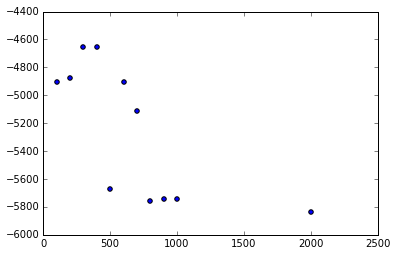

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.scatter(list(energies.keys()), list(energies.values()))